In [71]:
# 导入库
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [129]:
# 加载图片
def load_images(left_image_path, right_image_path):
    # 加载左图和右图
    imgL = cv2.imread(left_image_path, cv2.IMREAD_GRAYSCALE)
    imgR = cv2.imread(right_image_path, cv2.IMREAD_GRAYSCALE)
    return imgL, imgR

In [145]:
# 计算视差图
def compute_disparity(imgL, imgR):
    window_size = 5
    min_disp = 0
    num_disp = 16 * 3

    # 创建SGBM立体匹配对象
    stereo = cv2.StereoSGBM_create(
        minDisparity=min_disp,
        numDisparities=num_disp,
        blockSize=5,
        P1=8 * 1 * window_size ** 2,
        P2=32 * 1 * window_size ** 2,
        disp12MaxDiff=1,
        uniquenessRatio=10,
        speckleWindowSize=100,
        speckleRange=32
    )

    # 计算视差图
    disparity = stereo.compute(imgL, imgR).astype(np.float32) / 16.0
    return disparity


In [146]:
def show_and_save_disparity(disparity, save_path):
    # 显示视差图
    plt.figure(figsize=(10, 5))
    plt.imshow(disparity, 'gray')
    plt.colorbar()
    plt.title('Disparity Map')
    plt.show()

    # 保存视差图
    # 将视差图缩放到0-255范围以便保存为8位图像
    disparity_scaled = (disparity - disparity.min()) / (disparity.max() - disparity.min()) * 255
    disparity_scaled = disparity_scaled.astype(np.uint8)

    cv2.imwrite(save_path, disparity_scaled)


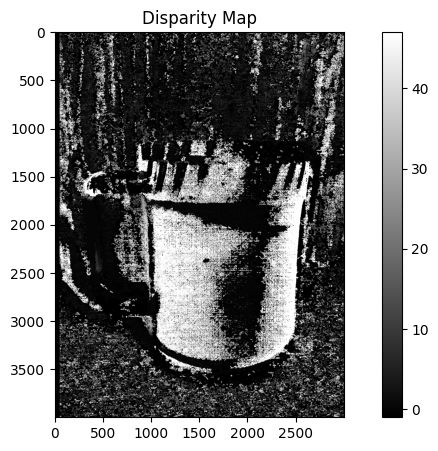

In [147]:
left_image_path = 'left.jpg'
right_image_path = 'right.jpg'
disparity_save_path = 'disparity_map_c.png'  # 视差图保存路径

imgL, imgR = load_images(left_image_path, right_image_path)

disparity = compute_disparity(imgL, imgR)

show_and_save_disparity(disparity, disparity_save_path)